### 무게를 찾기 
- 목표 : 농어 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습-방법 : 지도 학습 > 회귀
- 알고리즘 : 선형회귀 >>> 데이터 분포가 선형의 형태

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
# 데이터 준비
file_name = r'C:\VSCode\KDT\머신러닝\DAY01\fish.csv'
fish_df = pd.read_csv(file_name,usecols= [0,1,2])

In [231]:
fish_df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [232]:
fish_df = fish_df[fish_df['Species'] == 'Perch']

In [233]:
fish_df['Code'] = fish_df['Species'].replace('Perch',0)

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_19688\2938794026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fish_df['Code'] = fish_df['Species'].replace('Perch',0)


In [234]:
fish_df

,Species,Weight,Length,Code
72,Perch,5.9,8.4,0
73,Perch,32.0,13.7,0
74,Perch,40.0,15.0,0
75,Perch,51.5,16.2,0
76,Perch,70.0,17.4,0
77,Perch,100.0,18.0,0
78,Perch,78.0,18.7,0
79,Perch,80.0,19.0,0
80,Perch,85.0,19.6,0
81,Perch,85.0,20.0,0


In [235]:
features = fish_df[['Length']]

In [236]:
targetSR = fish_df['Weight']

In [237]:
from sklearn.preprocessing import OneHotEncoder

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [239]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 targetSR,
                                                 test_size=0.2,
                                                 random_state=10)

In [240]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (44, 1),2D
y_train : (44,),1D
X_test : (12, 1),2D
y_test : (12,),1D


In [241]:
LR = LinearRegression()

In [242]:
LR.fit(X_train,y_train)

LinearRegression()

In [243]:
LR.coef_,LR.intercept_

(array([37.07726677]), -645.2530112984248)

In [244]:
LR.score(X_test,y_test)

0.8386116153753965

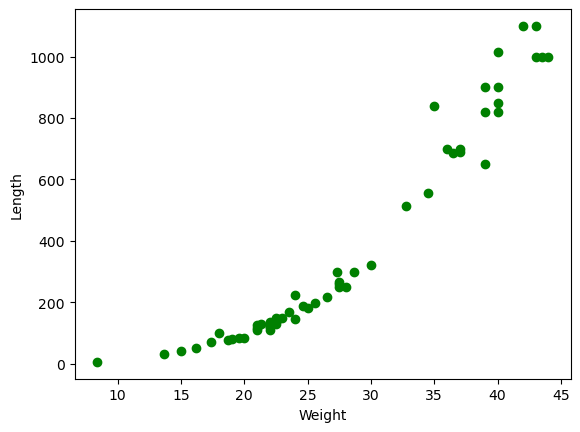

In [245]:
### 현재 데이터의 분포 확인
plt.plot(features,targetSR,'go')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

### 교차 검증

In [246]:
from sklearn.model_selection import cross_val_predict

In [247]:
pre_y = LR.predict(X_test)
pre_y

array([366.95637139, -44.6012897 , 374.37182474, 281.67865783,
       196.40094427, 170.44685753, 800.76039254, -89.09400982,
       226.06275768, 266.84775112, 392.91045812, 570.8813386 ])

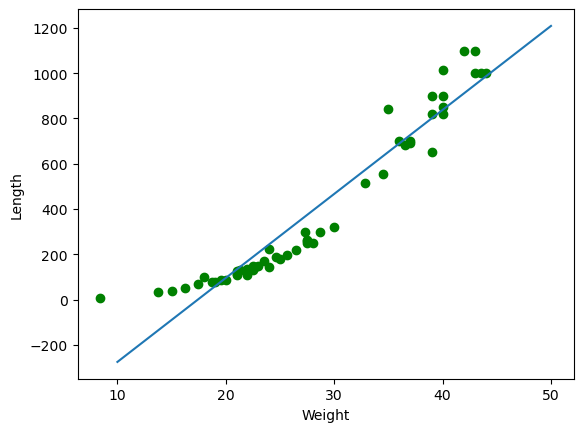

In [248]:
### 현재 데이터의 분포 확인
plt.plot(features,targetSR,'go')
plt.plot([10,50],[10*LR.coef_+LR.intercept_, 50*LR.coef_+LR.intercept_])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

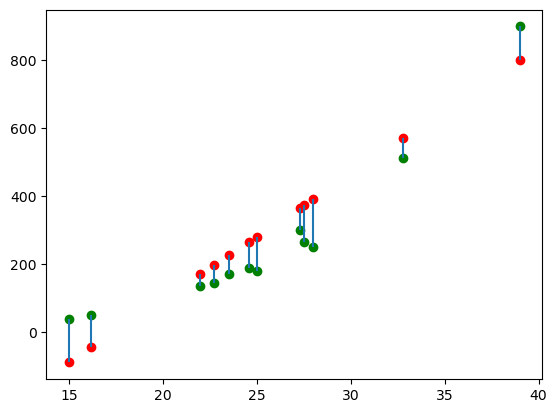

In [250]:
plt.plot(X_test,y_test,'go')
plt.plot(X_test,pre_y,'ro')
plt.vlines(X_test,y_test,pre_y)